In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [9]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% df from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]
q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% df from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% df from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% df from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% df from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% df from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

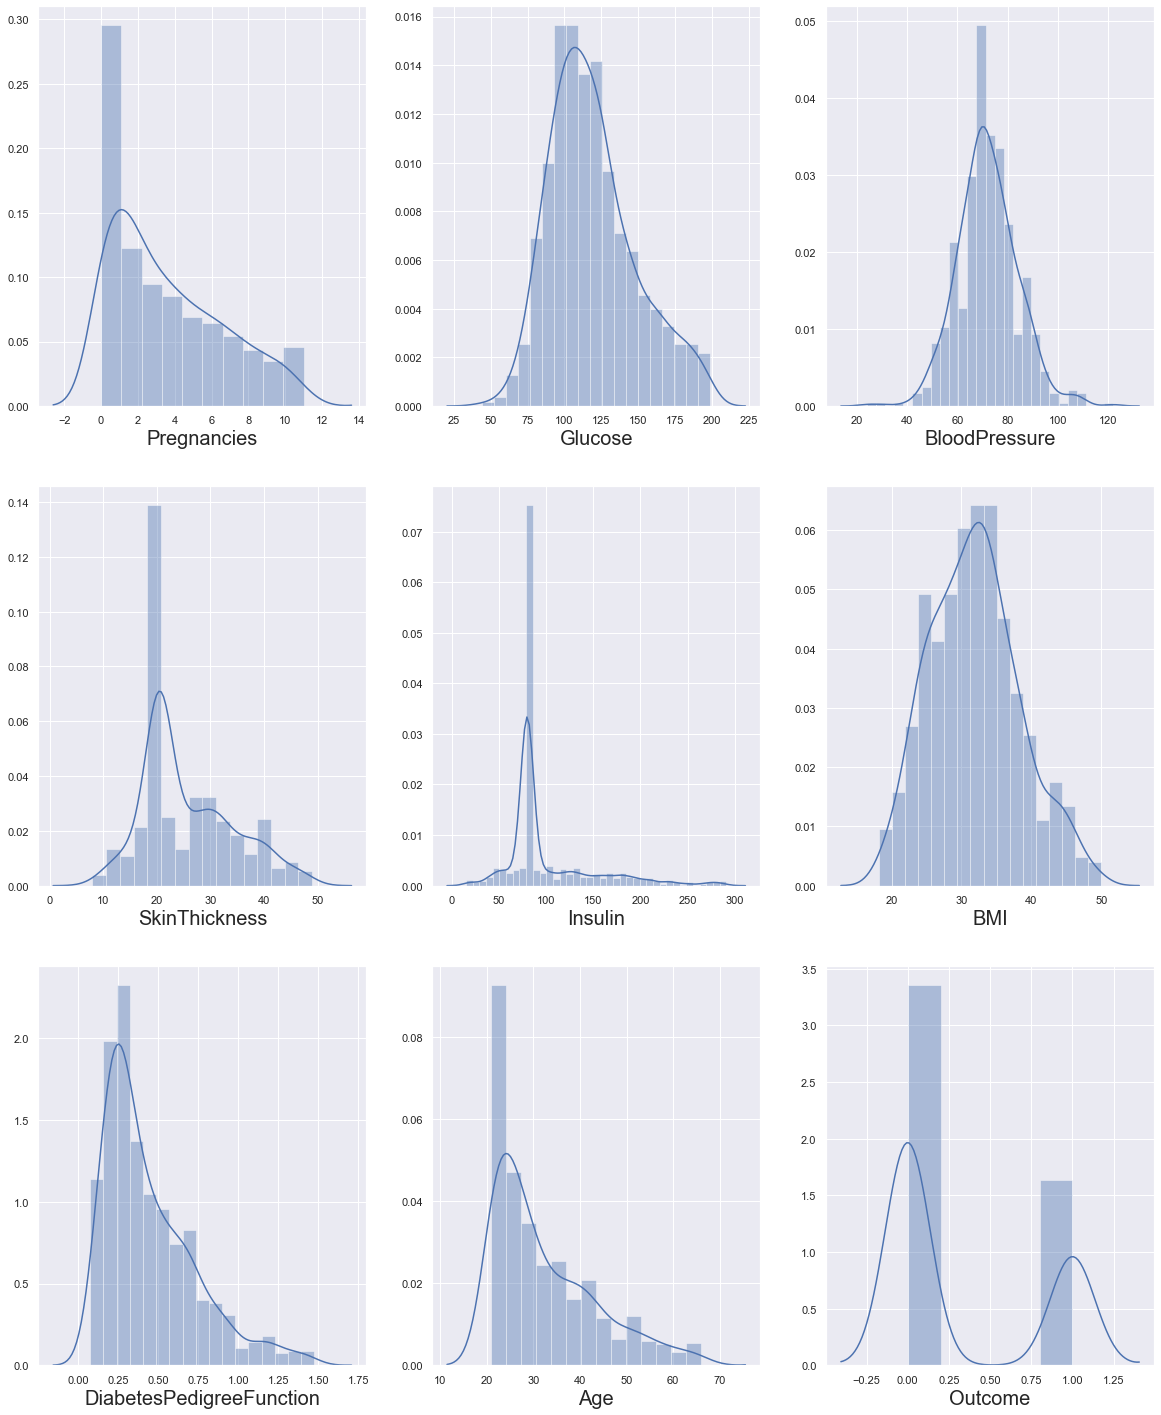

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [16]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [17]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [21]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model  = GaussianNB()

In [24]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction145.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar145.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [27]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [29]:
accuracy_score(y_test,y_pred)

0.7864583333333334

In [32]:
conf_mat = confusion_matrix(y_test,y_pred)

In [33]:
conf_mat

array([[109,  16],
       [ 25,  42]], dtype=int64)

In [34]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [35]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7864583333333334

In [36]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.872

In [37]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8134328358208955

In [38]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8416988416988417

In [41]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7494328358208956

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

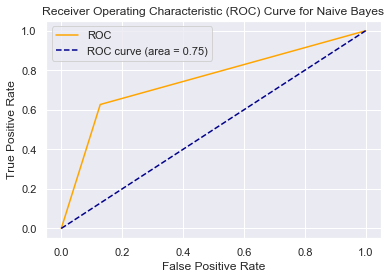

In [44]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_logistic = log_reg.predict(x_test)

In [47]:
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
accuracy_logistic

0.7552083333333334

In [48]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_logistic)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [49]:
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)

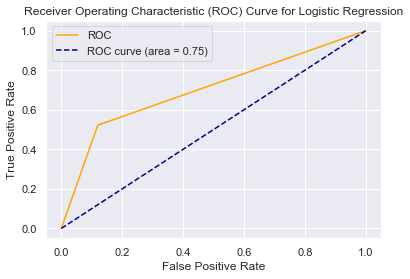

In [50]:
plt.plot(fpr_logistic, tpr_logistic, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

In [53]:
auc_naive = roc_auc_score(y_test,y_pred)
auc_naive

0.7494328358208956

In [54]:
auc_logistic=roc_auc_score(y_test,y_pred_logistic)
auc_logistic

0.7011940298507463